In [524]:
import keras
import numpy as np
from keras.datasets import mnist
import torchvision
import torchvision.datasets as datasets
import matplotlib.pyplot as plt

In [455]:
# Getting MNIST Data, reshaping it, and separating into train and test

(train_X, l_train), (test_X, l_test) = mnist.load_data()
train_y = np.zeros((l_train.shape[0], l_train.max()+1), dtype=np.float32)
train_y[np.arange(l_train.shape[0]), l_train] = 1
test_y = np.zeros((l_test.shape[0], l_test.max()+1), dtype=np.float32)
test_y[np.arange(l_test.shape[0]), l_test] = 1

test_X = np.reshape(test_X, (10000, 28 * 28))
test_X = test_X/255.0
train_X = np.reshape(train_X, (60000, 28 * 28))
train_X = train_X/255.0

# 3.2

I am using online stochastic gradient descent, which is where I estimate the gradient of the cost function for each train value and update the weights accordingly after every observation

In [537]:
def sig(x):
    return 1.0/(1.0 + np.exp(-x))
    
def sig_der(x):
    return sig(x) * (1-sig(x))

def calc_loss(y_hat, y):
    return np.sum(np.multiply(y, np.log(y_hat)) * -1.0) 


def fit(w1, w2, w3, x, y, itr):
    learning_rate = 0.05
    
    for i in range(itr):
        # calculate all activation functions
        z1 = np.matmul(w1, x)
        a1 = sig(z1)
        
        z2 = np.matmul(w2, a1)
        a2 = sig(z2)

        z3 = np.matmul(w3, a2)
        y_hat = np.exp(z3)/np.sum(np.exp(z3), axis=0)
        
        # loss
        loss = calc_loss(y_hat, y)
        
        #backwards_propagation
        
        #W3
        dz3 = y_hat.flatten() - y
        dz3 = dz3.reshape((-1,1))
        a2 = a2.reshape((1,-1))
        dw3 = np.matmul(dz3, a2)
        
        
        #W2    
        da2 = np.matmul(w3.T, dz3) 
        z2 = z2.reshape((-1,1))
        dz2 = da2 * sig(z2) * (1-sig(z2))
        a1 = a1.reshape((1,-1))
        dw2 = np.matmul(dz2, a1)
        
        #W1
        da1 = np.matmul(w2.T, dz2)
        z1 = z1.reshape((-1,1))
        dz1 = da1 * sig(z1) * (1-sig(z1))
        x = x.reshape((-1,1))
        dw1 = np.matmul(dz1, x.T)
        
        
        #adjust weights
        w3 = w3 - learning_rate * dw3
        w2 = w2 - learning_rate * dw2
        w1 = w1 - learning_rate * dw1 
        
    return w1, w2, w3
    

"""
Return weights for 3 layer neural network with given dimensions
"""    
def createnn(d, d1, d2, k, x_train, y_train, x_test, y_test, itr):
    
    #initialize weights for each layer
    w1 = np.random.randn(d1, d)
    w2 = np.random.randn(d2, d1)
    w3 = np.random.randn(k, d2)
    
    #accuracies
    val_acc = []
    train_acc = []
    val_loss = []
    train_loss = []
    
    for i in range(len(x_train)-1):
        w1, w2, w3 = fit(w1, w2, w3, x_train[i], y_train[i], itr)
        
        # Calculate train and validation loss/acc after every epoch
        if ((i+1)%6000 == 0):
            train, trainl = predict(w1,w2,w3,x_train,y_train)
            val, vall = predict(w1,w2,w3,x_test,y_test)
            print("EPOCH: ", str(int((i+1)/6000)))
            print("Train Acc: ", str(train))
            print("Train Loss: ", str(trainl))
            print("Val Acc: ", str(val))
            print("Val Loss: ", str(vall))
            
            val_acc.append(val)
            train_acc.append(train)
            val_loss.append(vall)
            train_loss.append(trainl)
            
    
    return w1, w2, w3, val_acc, train_acc, val_loss, train_loss

"""
Calculate accuracy/loss for given test set
"""
def predict(w1, w2, w3, x, y):
    accuracy = 0
    loss = 0
    for i in range(len(x) - 1):
        z1 = np.matmul(w1, x[i])
   
        a1 = sig(z1)
        
        z2 = np.matmul(w2, a1)
        a2 = sig(z2) 
        
        z3 = np.matmul(w3, a2)
        
        y_hat = np.exp(z3)/np.sum(np.exp(z3), axis=0)
        
        loss = loss + calc_loss(y_hat, y[i])
        
        if(np.argmax(y_hat, axis=0) == np.argmax(y[i], axis=0)):
              accuracy += 1
        
    return accuracy/len(x), loss/len(x)
    


In [538]:
w1, w2, w3, val_acc, train_acc, val_loss, train_loss = createnn(784, 100, 100, 10, train_X, train_y, test_X, test_y, 1)

EPOCH:  1
Train Acc:  0.8265166666666667
Train Loss:  0.5906828194649671
Val Acc:  0.8278
Val Loss:  0.585869797962152
EPOCH:  2
Train Acc:  0.84225
Train Loss:  0.5502296345852433
Val Acc:  0.8387
Val Loss:  0.5623717088000394
EPOCH:  3
Train Acc:  0.8401833333333333
Train Loss:  0.5558988535673264
Val Acc:  0.842
Val Loss:  0.5621621395562004
EPOCH:  4
Train Acc:  0.89775
Train Loss:  0.35258875033594905
Val Acc:  0.8969
Val Loss:  0.3709698691579845
EPOCH:  5
Train Acc:  0.89075
Train Loss:  0.377354109596495
Val Acc:  0.8911
Val Loss:  0.38023991571385185
EPOCH:  6
Train Acc:  0.9057
Train Loss:  0.33032904976142413
Val Acc:  0.9043
Val Loss:  0.34179296108766505
EPOCH:  7
Train Acc:  0.8974166666666666
Train Loss:  0.347750228394546
Val Acc:  0.8934
Val Loss:  0.3777924517596624
EPOCH:  8
Train Acc:  0.8992666666666667
Train Loss:  0.34208783491817335
Val Acc:  0.8987
Val Loss:  0.35620654784856076
EPOCH:  9
Train Acc:  0.9122333333333333
Train Loss:  0.28915926092687033
Val Acc: 

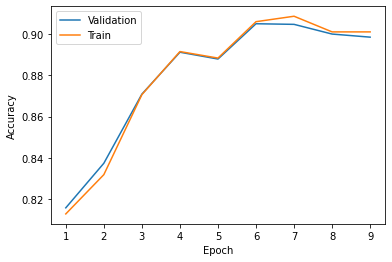

In [529]:
# Plotting
x = [1,2,3,4,5,6,7,8,9]
plt.plot(x, val_acc, label = "Validation")
plt.plot(x, train_acc, label = "Train")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

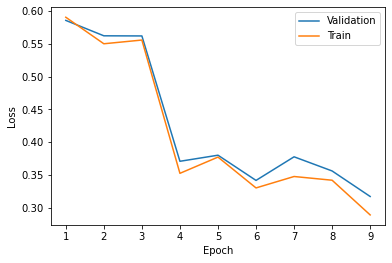

In [539]:
plt.plot(x, val_loss, label = "Validation")
plt.plot(x, train_loss, label = "Train")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# 3.3

In [492]:

from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD

In [506]:
#Neural net with keras. Created same 3 layer neural network with same dimensions

model = Sequential()
model.add(Dense(100, activation='sigmoid', input_dim=784))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
        
hist = model.fit(train_X,train_y, epochs=10, batch_size=32, verbose=2, validation_split=0.2)


Epoch 1/10
1500/1500 - 3s - loss: 1.0193 - accuracy: 0.7090 - val_loss: 0.3997 - val_accuracy: 0.8928 - 3s/epoch - 2ms/step
Epoch 2/10
1500/1500 - 2s - loss: 0.3617 - accuracy: 0.8974 - val_loss: 0.3055 - val_accuracy: 0.9104 - 2s/epoch - 1ms/step
Epoch 3/10
1500/1500 - 2s - loss: 0.2980 - accuracy: 0.9129 - val_loss: 0.2599 - val_accuracy: 0.9246 - 2s/epoch - 2ms/step
Epoch 4/10
1500/1500 - 2s - loss: 0.2590 - accuracy: 0.9250 - val_loss: 0.2360 - val_accuracy: 0.9320 - 2s/epoch - 1ms/step
Epoch 5/10
1500/1500 - 2s - loss: 0.2276 - accuracy: 0.9336 - val_loss: 0.2084 - val_accuracy: 0.9402 - 2s/epoch - 1ms/step
Epoch 6/10
1500/1500 - 2s - loss: 0.2022 - accuracy: 0.9397 - val_loss: 0.1891 - val_accuracy: 0.9455 - 2s/epoch - 1ms/step
Epoch 7/10
1500/1500 - 2s - loss: 0.1813 - accuracy: 0.9458 - val_loss: 0.1730 - val_accuracy: 0.9518 - 2s/epoch - 2ms/step
Epoch 8/10
1500/1500 - 2s - loss: 0.1624 - accuracy: 0.9530 - val_loss: 0.1581 - val_accuracy: 0.9555 - 2s/epoch - 1ms/step
Epoch 9/

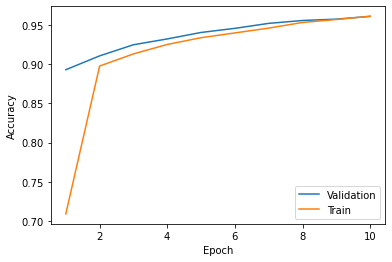

In [540]:
#Plotting
x = [1,2,3,4,5,6,7,8,9,10]
plt.plot(x, hist.history['val_accuracy'], label = "Validation")
plt.plot(x, hist.history['accuracy'], label = "Train")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

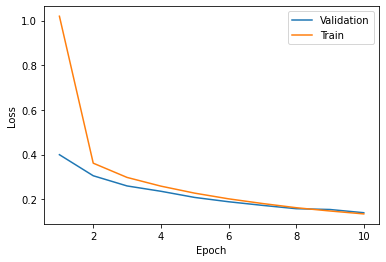

In [549]:
plt.plot(x,hist.history['val_loss'], label = "Validation")
plt.plot(x, hist.history['loss'], label = "Train")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# 3.4

In [545]:
# First model a, with all weights initialized to zero
modela = Sequential()
modela.add(Dense(100, kernel_initializer='zero', activation='sigmoid', input_dim=784))
modela.add(Dense(100, kernel_initializer='zero',activation='sigmoid'))
modela.add(Dense(10, kernel_initializer='zero',activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

print(modela.get_weights())


[array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32), array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), array([0., 0., 0., 0

In [546]:
modela.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
        
hista = modela.fit(train_X,train_y, epochs=10, batch_size=32, verbose=2, validation_split=0.2)

Epoch 1/10
1500/1500 - 3s - loss: 2.3129 - accuracy: 0.1053 - val_loss: 2.3071 - val_accuracy: 0.1060 - 3s/epoch - 2ms/step
Epoch 2/10
1500/1500 - 2s - loss: 2.3011 - accuracy: 0.1124 - val_loss: 2.2631 - val_accuracy: 0.1078 - 2s/epoch - 2ms/step
Epoch 3/10
1500/1500 - 2s - loss: 2.0214 - accuracy: 0.2546 - val_loss: 1.8714 - val_accuracy: 0.3109 - 2s/epoch - 2ms/step
Epoch 4/10
1500/1500 - 2s - loss: 1.7822 - accuracy: 0.3244 - val_loss: 1.7153 - val_accuracy: 0.3454 - 2s/epoch - 2ms/step
Epoch 5/10
1500/1500 - 2s - loss: 1.6889 - accuracy: 0.3432 - val_loss: 1.6555 - val_accuracy: 0.3528 - 2s/epoch - 2ms/step
Epoch 6/10
1500/1500 - 2s - loss: 1.6480 - accuracy: 0.3576 - val_loss: 1.6255 - val_accuracy: 0.3701 - 2s/epoch - 2ms/step
Epoch 7/10
1500/1500 - 2s - loss: 1.6229 - accuracy: 0.3649 - val_loss: 1.5994 - val_accuracy: 0.3728 - 2s/epoch - 2ms/step
Epoch 8/10
1500/1500 - 2s - loss: 1.6042 - accuracy: 0.3666 - val_loss: 1.5781 - val_accuracy: 0.3832 - 2s/epoch - 2ms/step
Epoch 9/

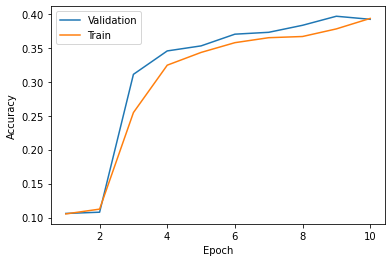

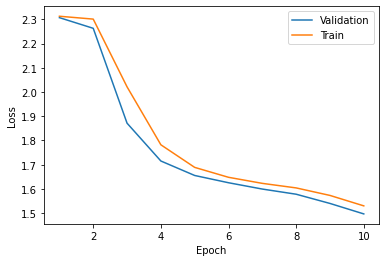

In [548]:
# Loss and accuracy plots for Model A
plt.plot(x, hista.history['val_accuracy'], label = "Validation")
plt.plot(x, hista.history['accuracy'], label = "Train")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(x,hista.history['val_loss'], label = "Validation")
plt.plot(x, hista.history['loss'], label = "Train")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [551]:
# Model b has weights initizilized between -1 and 1
modelb = Sequential()
modelb.add(Dense(100, activation='sigmoid', input_dim=784))
modelb.add(Dense(100,activation='sigmoid'))
modelb.add(Dense(10,activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

print(modelb.get_weights())

[array([[ 0.0786135 , -0.00029909, -0.01175488, ..., -0.01854919,
         0.06017877, -0.04602566],
       [-0.06944203,  0.04047247, -0.04028243, ..., -0.05743103,
        -0.01407603, -0.05899683],
       [ 0.070279  ,  0.02161765,  0.04576093, ...,  0.01709323,
        -0.0126844 ,  0.02752914],
       ...,
       [ 0.0784416 ,  0.0257853 ,  0.06052665, ..., -0.04327708,
        -0.03283455, -0.00389693],
       [ 0.03610212,  0.04914327, -0.04265849, ..., -0.00390889,
        -0.07877899,  0.06821945],
       [-0.07232919, -0.05841267, -0.02623267, ...,  0.07362296,
        -0.0128163 ,  0.01718209]], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [552]:
modelb.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
        
hista = modelb.fit(train_X,train_y, epochs=10, batch_size=32, verbose=2, validation_split=0.2)

Epoch 1/10
1500/1500 - 3s - loss: 1.0196 - accuracy: 0.7057 - val_loss: 0.4122 - val_accuracy: 0.8859 - 3s/epoch - 2ms/step
Epoch 2/10
1500/1500 - 2s - loss: 0.3707 - accuracy: 0.8960 - val_loss: 0.3066 - val_accuracy: 0.9119 - 2s/epoch - 2ms/step
Epoch 3/10
1500/1500 - 2s - loss: 0.3022 - accuracy: 0.9124 - val_loss: 0.2675 - val_accuracy: 0.9207 - 2s/epoch - 2ms/step
Epoch 4/10
1500/1500 - 2s - loss: 0.2614 - accuracy: 0.9239 - val_loss: 0.2352 - val_accuracy: 0.9327 - 2s/epoch - 2ms/step
Epoch 5/10
1500/1500 - 2s - loss: 0.2281 - accuracy: 0.9333 - val_loss: 0.2097 - val_accuracy: 0.9392 - 2s/epoch - 2ms/step
Epoch 6/10
1500/1500 - 2s - loss: 0.2010 - accuracy: 0.9409 - val_loss: 0.1856 - val_accuracy: 0.9469 - 2s/epoch - 2ms/step
Epoch 7/10
1500/1500 - 2s - loss: 0.1790 - accuracy: 0.9475 - val_loss: 0.1756 - val_accuracy: 0.9508 - 2s/epoch - 2ms/step
Epoch 8/10
1500/1500 - 2s - loss: 0.1614 - accuracy: 0.9529 - val_loss: 0.1563 - val_accuracy: 0.9566 - 2s/epoch - 2ms/step
Epoch 9/

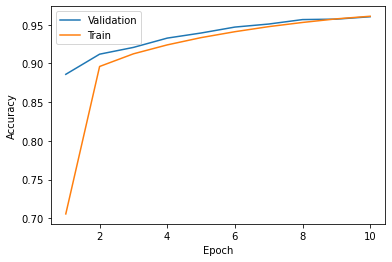

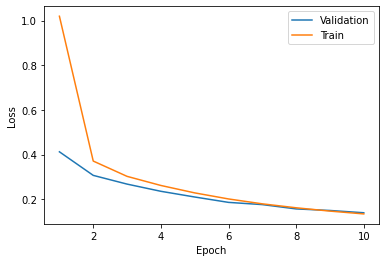

In [553]:
# Loss and accuracy plots for Model B
plt.plot(x, hista.history['val_accuracy'], label = "Validation")
plt.plot(x, hista.history['accuracy'], label = "Train")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(x,hista.history['val_loss'], label = "Validation")
plt.plot(x, hista.history['loss'], label = "Train")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()